In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
# Load Dataset
dataset = pd.read_csv("Emotion_classify_Data.csv")

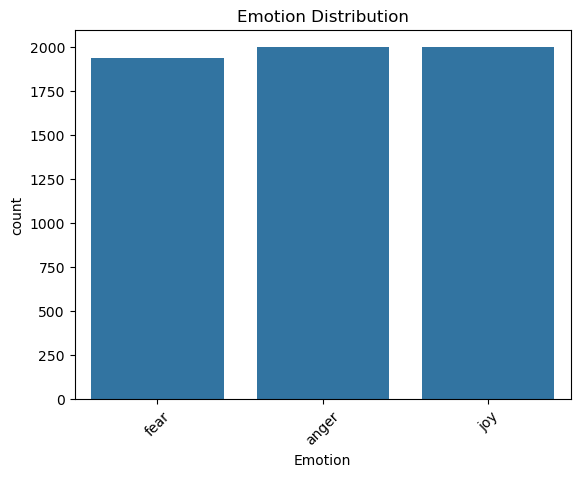

In [28]:
# Exploratory Data Analysis
plt.figure()
sns.countplot(x=dataset["Emotion"])
plt.title("Emotion Distribution")
plt.xticks(rotation=45)
plt.show()

In [29]:
# Define Features and Target
X = dataset["Comment"]   # Text column
y = dataset["Emotion"]   # Target labels

In [30]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Hyperparameter Tuning Grid
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_df': [0.9, 1.0],
    'nb__alpha': [0.1, 0.5, 1.0]
}

# GridSearch with 5-Fold CV
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [32]:
# Train Model
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on Test Set
test_accuracy = grid.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'nb__alpha': 1.0, 'tfidf__max_df': 0.9, 'tfidf__ngram_range': (1, 1)}
Best Cross-Validation Score: 0.888609173090788
Test Accuracy: 0.898989898989899


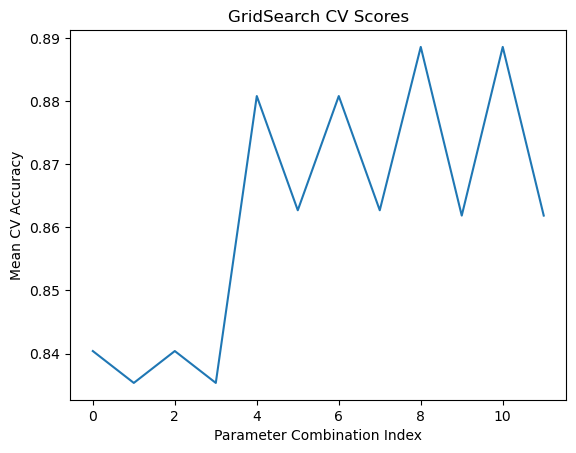

In [33]:
# Plot GridSearch CV Scores
cv_scores = grid.cv_results_['mean_test_score']

plt.figure()
plt.plot(cv_scores)
plt.title("GridSearch CV Scores")
plt.xlabel("Parameter Combination Index")
plt.ylabel("Mean CV Accuracy")
plt.show()

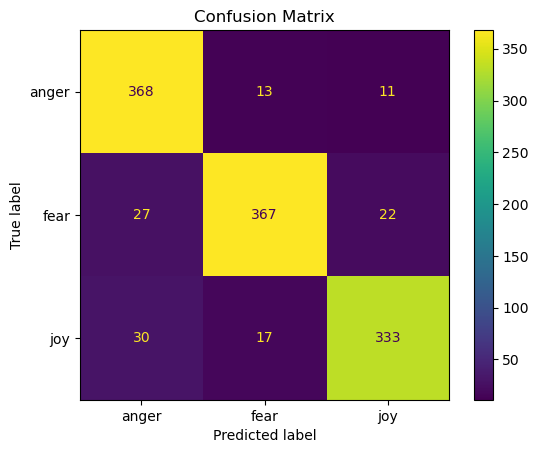

In [34]:
# Confusion Matrix
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=grid.classes_
)
disp.plot()
plt.title("Confusion Matrix")
plt.show()